### CONCEITO: GRU (GATED RECURRENT UNIT)

### 📘 1. Introdução
--------------------------------------------------------------
As GRUs são uma alternativa simplificada às LSTMs.
Também resolvem o problema de dependências longas em RNNs,
mas com menos parâmetros (e mais rápidas para treinar).

Elas combinam as portas de entrada e esquecimento em uma só,
mantendo desempenho competitivo em muitos cenários.

Ideal para:
- Previsões sequenciais
- Tradução de linguagem natural
- Aplicações em tempo real

### 📘 2. Estrutura de uma célula GRU
--------------------------------------------------------------
Principais componentes:
- Porta de atualização: controla quanto da memória anterior é mantida
- Porta de reinicialização: decide quanto da memória passada deve ser esquecida

GRUs são mais simples que LSTMs e funcionam bem em muitos problemas
com menos custo computacional.

### 📘 3. Exemplo prático: Previsão de sequência

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras import Input
import matplotlib.pyplot as plt

# Gerando dados sequenciais simples
dados = np.arange(100)

# Função para gerar janelas temporais
def criar_sequencia(dados, passo):
    X, y = [], []
    for i in range(len(dados) - passo):
        X.append(dados[i:i+passo])
        y.append(dados[i+passo])
    return np.array(X), np.array(y)

passo = 5
X, y = criar_sequencia(dados, passo)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Normalizando os dados
X = X / np.max(dados)
y = y / np.max(dados)

# Separando treino/teste
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

### 📘 4. Construção do modelo GRU

In [2]:
model = Sequential()
model.add(Input(shape=(passo, 1)))
model.add(GRU(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

### 📘 5. Treinamento e Avaliação

In [3]:
history = model.fit(X_train, y_train, epochs=200, verbose=0)
loss = model.evaluate(X_test, y_test)
print(f"Loss no teste: {loss:.6f}")

# Previsões
y_pred = model.predict(X_test)

# Desnormalizando
y_pred_rescaled = y_pred * np.max(dados)
y_test_rescaled = y_test * np.max(dados)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step - loss: 2.2072e-05
Loss no teste: 0.000022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


### 📘 6. Visualização dos resultados

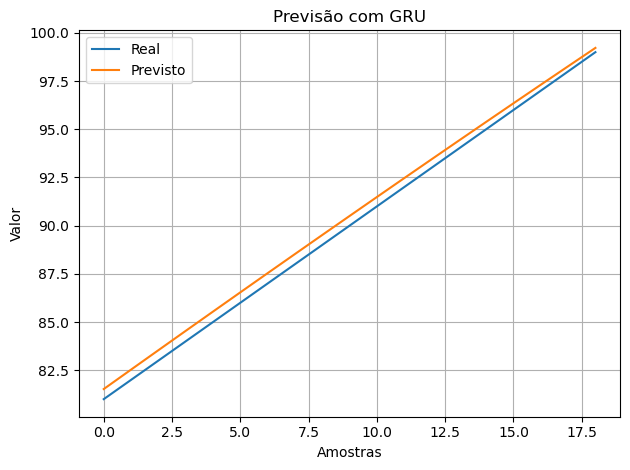

In [5]:
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_rescaled, label='Previsto')
plt.title("Previsão com GRU")
plt.xlabel("Amostras")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📘 7. Conclusão
--------------------------------------------------------------
- GRU é uma variação mais simples da LSTM
- Menos parâmetros, menor risco de overfitting
- Boa escolha para tarefas sequenciais quando os dados
  não exigem tanta complexidade de memória

Em problemas mais complexos, LSTMs ainda podem ter vantagem
Mas GRUs costumam treinar mais rápido com desempenho similar

Fim do conceito GRU